In [1]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('C:/Users/sachi/Downloads/datasetsandcodefilesstockmarketprediction/NSE-TATAGLOBAL11.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1235, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [12]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0183 - 11s/epoch - 315ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0042 - 4s/epoch - 117ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0038 - 4s/epoch - 119ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0030 - 4s/epoch - 117ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0032 - 4s/epoch - 116ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0027 - 4s/epoch - 113ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0046 - 4s/epoch - 109ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0033 - 4s/epoch - 106ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0027 - 4s/epoch - 107ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0022 - 4s/epoch - 106ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0028 - 4s/epoch - 101ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0025 - 4s/epoch - 103ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0021 - 4s/epoch - 106ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0020 - 4s/epoch - 111ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0025 - 4s/epoch - 115ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0020 - 4s/epoch - 116ms/step
Epoch 17/20
35/

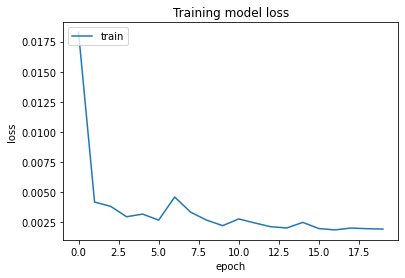

In [13]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
testData = pd.read_csv('NSE-TATAGLOBAL11test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(702, 60, 1)

In [18]:
y_pred = model.predict(X_test)
y_pred

22/22 [==============================] - 2s 24ms/step


array([[0.5670671 ],
       [0.556257  ],
       [0.5447236 ],
       [0.5336546 ],
       [0.52306694],
       [0.5133388 ],
       [0.50491047],
       [0.4984181 ],
       [0.4934299 ],
       [0.49013025],
       [0.48851216],
       [0.4877651 ],
       [0.4875253 ],
       [0.4855169 ],
       [0.47857678],
       [0.46471196],
       [0.44459862],
       [0.4210166 ],
       [0.39752665],
       [0.37651122],
       [0.35940373],
       [0.34651315],
       [0.3378706 ],
       [0.3333642 ],
       [0.33235013],
       [0.33385596],
       [0.3373222 ],
       [0.34210807],
       [0.34738147],
       [0.3526511 ],
       [0.357392  ],
       [0.36171114],
       [0.36562747],
       [0.36944532],
       [0.37301165],
       [0.3761337 ],
       [0.37849176],
       [0.379412  ],
       [0.37831676],
       [0.374032  ],
       [0.3657051 ],
       [0.35391074],
       [0.33929783],
       [0.3231144 ],
       [0.306662  ],
       [0.291027  ],
       [0.27700645],
       [0.264

In [20]:
predicted_price = sc.inverse_transform(y_pred)

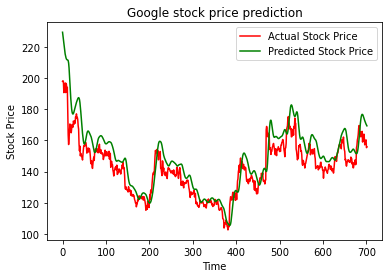

In [21]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()